# Adult Dataset
        

Demographic Parity Difference by Gender: 0.20
Demographic Parity Difference by Race: 0.60


C:\Users\duwayne.blok\AppData\Local\Temp\ipykernel_14168\2733153543.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Female', 'Male'], y=[p_female, p_male], palette='pastel')


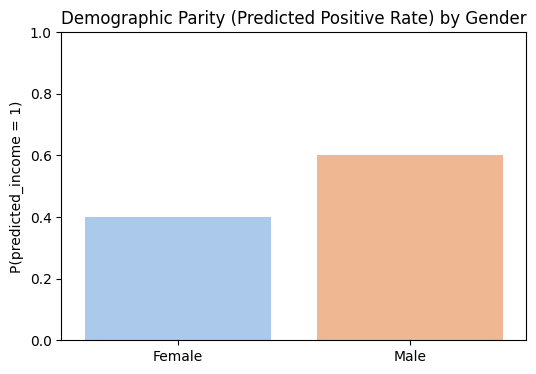

C:\Users\duwayne.blok\AppData\Local\Temp\ipykernel_14168\2733153543.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['White', 'Non-White'], y=[p_white, p_nonwhite], palette='coolwarm')


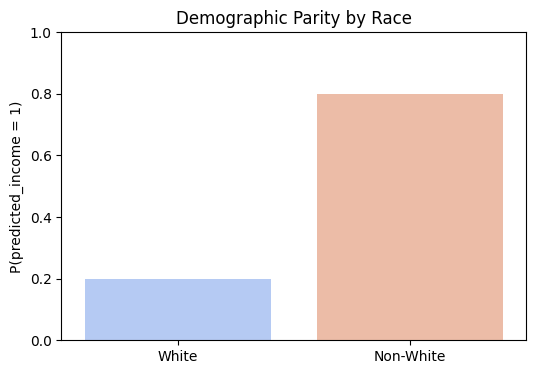

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic dataset
data = {
    "gender": [0, 0, 1, 1, 0, 1, 0, 1, 0, 1],  # 0 = Female, 1 = Male
    "race":   [1, 0, 1, 1, 0, 1, 1, 0, 0, 0],        # 0 = White, 1 = Non-White
    "predicted_income": [1, 0, 1, 1, 0, 0, 1, 1, 0, 0],  # 1 = income >50K
    "actual_income": [1, 0, 1, 0, 0, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

# Calculate Demographic Parity Difference
#BY GENDER
p_male = df[df['gender'] == 1]['predicted_income'].mean()
p_female = df[df['gender'] == 0]['predicted_income'].mean()
dpd_gender = abs(p_male - p_female)
print(f"Demographic Parity Difference by Gender: {dpd_gender:.2f}")

# RACE
p_white = df[df['race'] == 0]['predicted_income'].mean()
p_nonwhite = df[df['race'] == 1]['predicted_income'].mean()
dpd_race = abs(p_white - p_nonwhite)
print(f"Demographic Parity Difference by Race: {dpd_race:.2f}")


# Visualization
# BAR PLOT FOR: GENDER
plt.figure(figsize=(6,4))
sns.barplot(x=['Female', 'Male'], y=[p_female, p_male], palette='pastel')
plt.ylabel("P(predicted_income = 1)")
plt.title("Demographic Parity (Predicted Positive Rate) by Gender")
plt.ylim(0,1)
plt.show()

# BAR PLOT FOR : RACE
plt.figure(figsize=(6,4))
sns.barplot(x=['White', 'Non-White'], y=[p_white, p_nonwhite], palette='coolwarm')
plt.title("Demographic Parity by Race")
plt.ylabel("P(predicted_income = 1)")
plt.ylim(0, 1)
plt.show()



# fairlearn Notebook

Demographic Parity by Gender:
gender
0    0.4
1    0.6
Name: selection_rate, dtype: float64

Demographic Parity by Race:
race
0    0.2
1    0.8
Name: selection_rate, dtype: float64


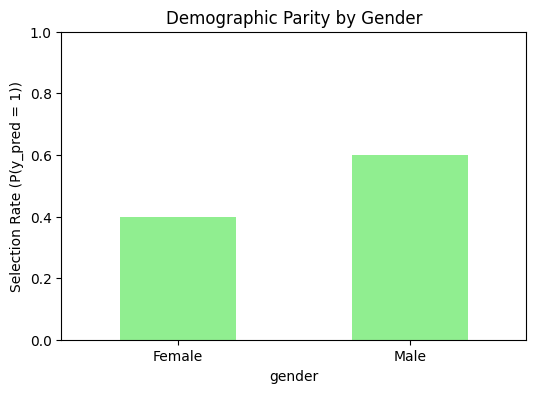

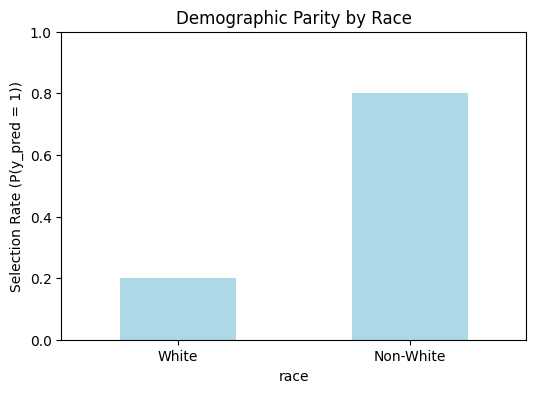

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fairlearn.metrics import MetricFrame, selection_rate

# Synthetic dataset with gender and race
data = {
    "gender": [0, 0, 1, 1, 0, 1, 0, 1, 0, 1],         # 0 = Female, 1 = Male
    "race":   [1, 0, 1, 1, 0, 1, 1, 0, 0, 0],         # 0 = White, 1 = Non-White
    "y_pred": [1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
    "y_true": [1, 0, 1, 0, 0, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)


# Calculate Demographic Parity Difference
# by gender
mf_gender = MetricFrame(metrics=selection_rate,
                        y_true=df["y_true"],
                        y_pred=df["y_pred"],
                        sensitive_features=df["gender"])

print("Demographic Parity by Gender:")
print(mf_gender.by_group)


# by race
mf_race = MetricFrame(metrics=selection_rate,
                      y_true=df["y_true"],
                      y_pred=df["y_pred"],
                      sensitive_features=df["race"])

print("\nDemographic Parity by Race:")
print(mf_race.by_group)


# Visualization
# BAR PLOT by gender
plt.figure(figsize=(6,4))
mf_gender.by_group.plot(kind='bar', color='lightgreen')
plt.title("Demographic Parity by Gender")
plt.ylabel("Selection Rate (P(y_pred = 1))")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"], rotation=0)
plt.ylim(0,1)
plt.show()


# BAR PLOT by race
plt.figure(figsize=(6,4))
mf_race.by_group.plot(kind='bar', color='lightblue')
plt.title("Demographic Parity by Race")
plt.ylabel("Selection Rate (P(y_pred = 1))")
plt.xticks(ticks=[0, 1], labels=["White", "Non-White"], rotation=0)
plt.ylim(0,1)
plt.show()
